In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math # for e
import sys # For saving test data set

In [2]:
"""
Generate test data set starting from a known linear function
synthetic data = (x, trueWeight * x + trueBias + noise)
"""
n = 35
dataSetX = np.arange(n)
trueWeight, trueBias = 1.3, 0.7
noiseLevel = 6.5
dataSetY = trueWeight * dataSetX + trueBias + noiseLevel * np.random.randn(n)

In [3]:
"""
Define architecture
"""

def f_wb(w:float, b:float, x:float):
    return w*x + b

def JCost(dataSetX, dataSetY, w, b):
    return sum((f_wb(w, b, dataSetX) - dataSetY))**2 / (2*len(dataSetX))
    
def weightDerivative(dataSetX, dataSetY, w, b):
    return sum((f_wb(w, b, dataSetX) - dataSetY) * dataSetX) / len(dataSetX)
    
def biasDerivative(dataSetX, dataSetY, w, b):
    return sum((f_wb(w, b, dataSetX) - dataSetY)) / len(dataSetX)
    
def gradientDescent(dataSetX, dataSetY, alpha, iterations):
    w, b = 0, 0
    iter, cost = 0, float("inf")
    tolerance = len(dataSetX) * noiseLevel / 10000
    costArr = []
    while iter < iterations:
        temp_w = w - alpha * weightDerivative(dataSetX, dataSetY, w, b)
        temp_b = b - alpha * biasDerivative(dataSetX, dataSetY, w, b)
        w, b = temp_w, temp_b
        cost = JCost(dataSetX, dataSetY, w, b)
        costArr.append(cost)
        iter += 1
    return w, b, cost, costArr

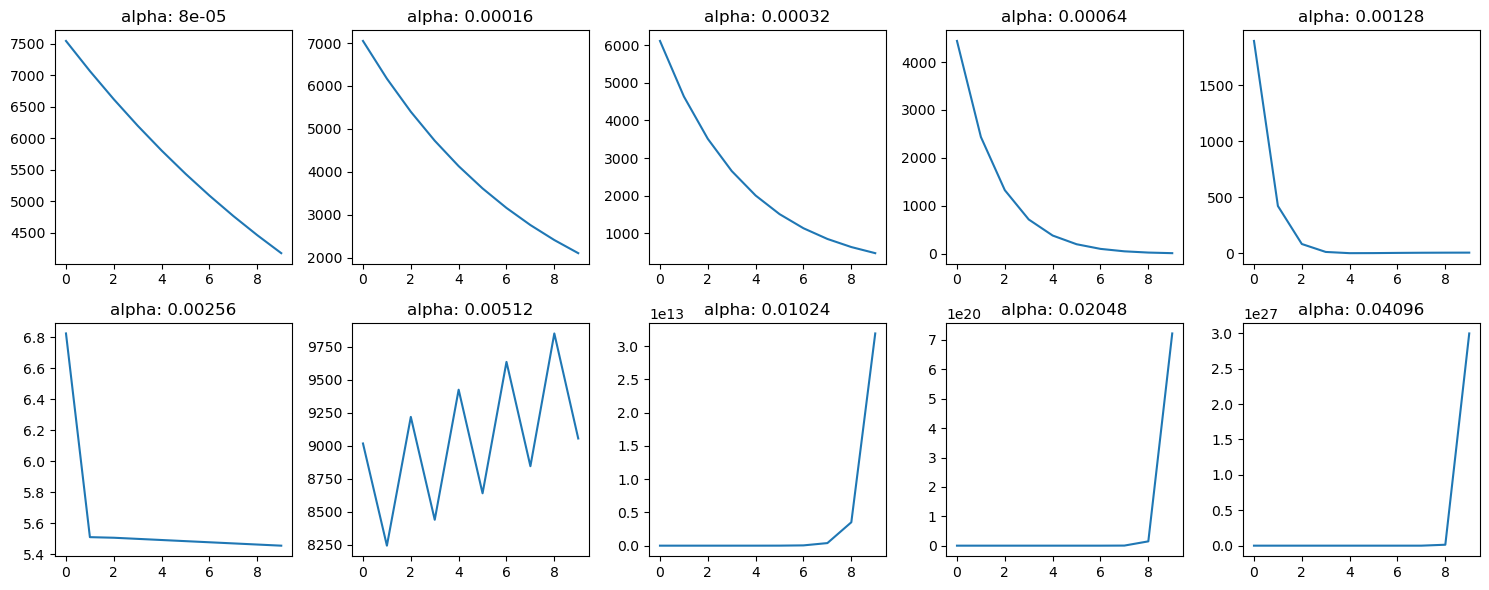

In [4]:
"""
Choose alpha
"""
alphaChoices = [8e-5]
testIterations = 10 
for i in range(9):
    alphaChoices.append(alphaChoices[-1] * 2)

x = np.arange(testIterations)
n_cols = int(np.ceil(len(alphaChoices) / 2))
fig, axes = plt.subplots(2, n_cols, figsize=(n_cols * 3, 6))
axes = axes.flatten()
for idx, alpha in enumerate(alphaChoices):
    w, b, cost, costArr = gradientDescent(dataSetX, dataSetY, alpha, testIterations)
    axes[idx].plot(x, costArr)
    axes[idx].set_title(f"alpha: {alpha}")
for ax in axes[len(alphaChoices):]:
    ax.axis("off")
plt.tight_layout()
plt.show()

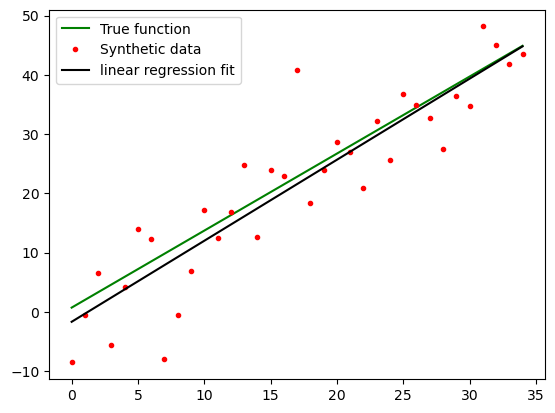

In [5]:
"""
Train using the right alpha and display results
"""
alpha = 0.000128
w, b, cost, costArr = gradientDescent(dataSetX, dataSetY, 0.00064, 10000)
plt.plot(dataSetX, trueWeight * dataSetX + trueBias, 'g', label='True function')
plt.plot(dataSetX, dataSetY, 'r.', label='Synthetic data')
plt.plot(dataSetX, w*dataSetX+b, label="linear regression fit", c='black')
plt.legend()
plt.show()

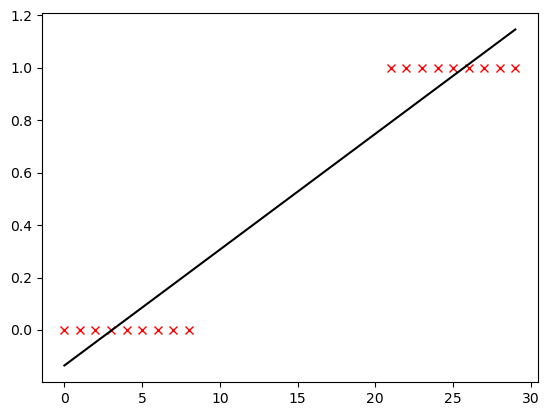

In [6]:
"""
Linear regression is not the best technique for classification tasks.
"""
n = 30
benX = np.arange(n//2-n//5)
benY = np.array([0]*len(benX))

malX = np.arange(n//2+n//5, n)
malY = np.array([1]*len(malX))

dataSetX = list(benX)
dataSetX.extend(list(malX))
dataSetX = np.array(dataSetX)
dataSetY = list(benY)
dataSetY.extend(list(malY))
dataSetY = np.array(dataSetY)

w, b, cost, costArr = gradientDescent(dataSetX, dataSetY, 0.00064, 10000)
def model(x):
    return f_wb(w, b, x)
half = int(len(dataSetX)/2)
plt.plot(benX, benY, 'rx', label='benign')
plt.plot(malX, malY, 'rx', label='malignant')
plt.plot(dataSetX, model(dataSetX), label="linear regression fit", c='black')

plt.show()

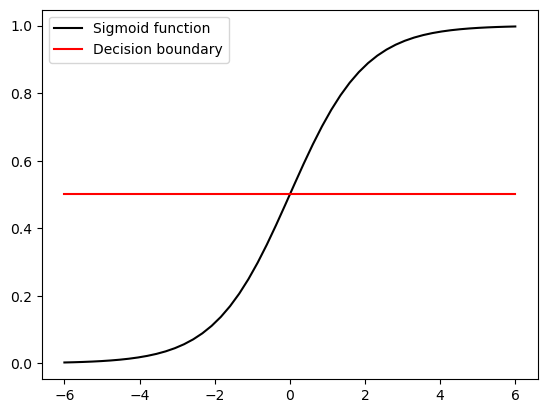

In [7]:
"""
Sigmoid function
"""
x = np.linspace(-6, 6)
y = 1/(1 + math.e**-x)
plt.plot(x, y, 'black', label='Sigmoid function')
plt.plot(x, np.array([0.5]*len(x)), 'r', label="Decision boundary")
plt.legend()
plt.show()